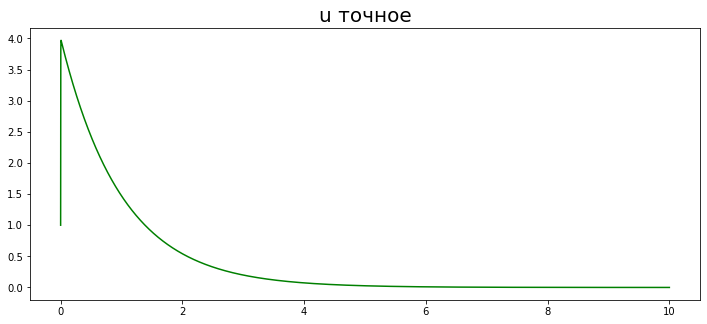

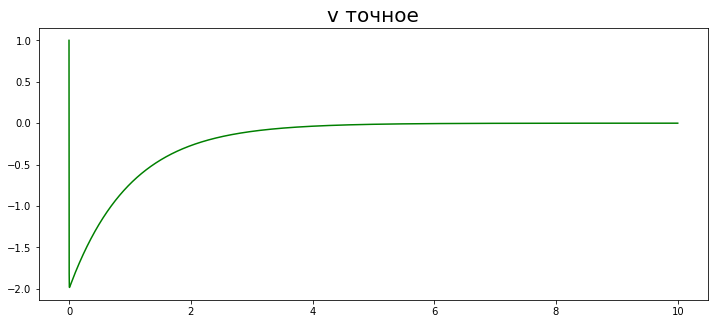

h =  0.0001


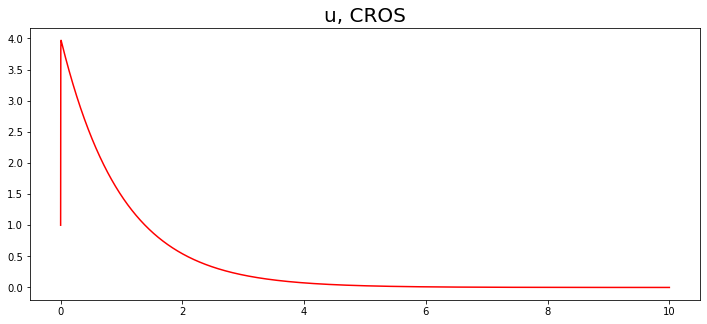

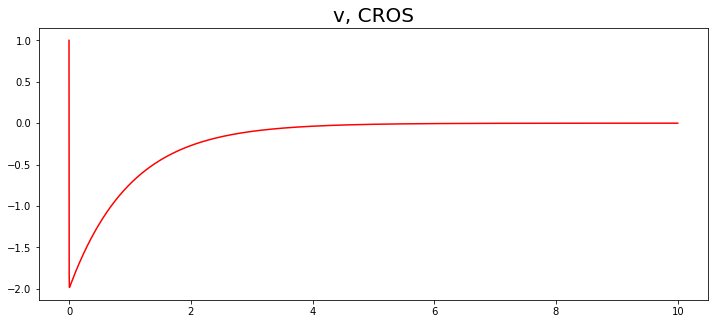

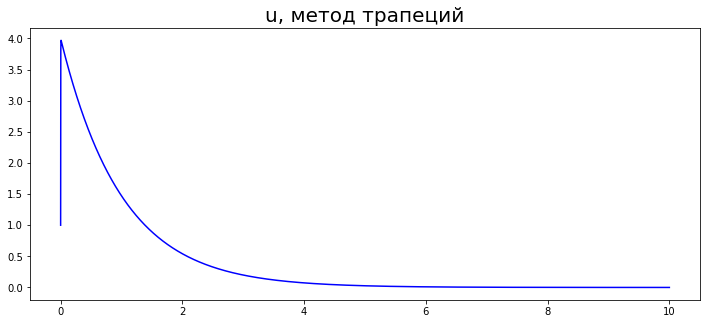

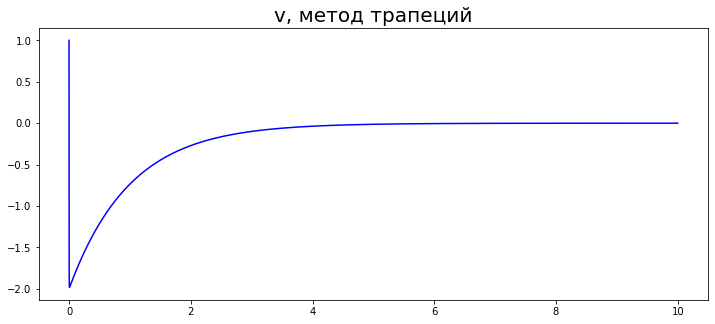

h =  0.001


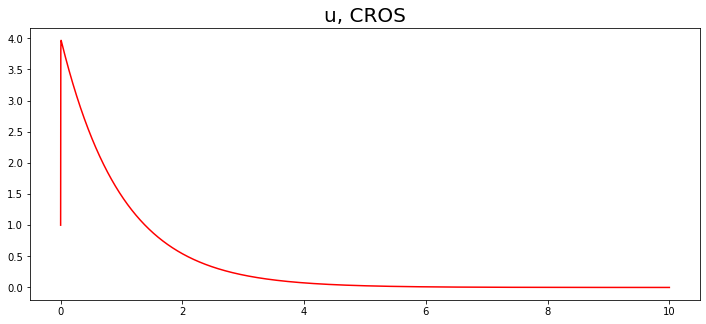

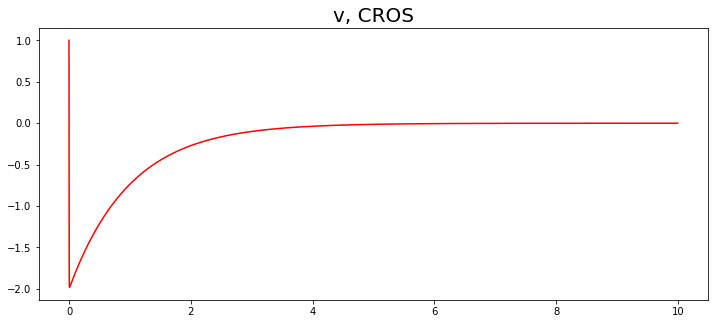

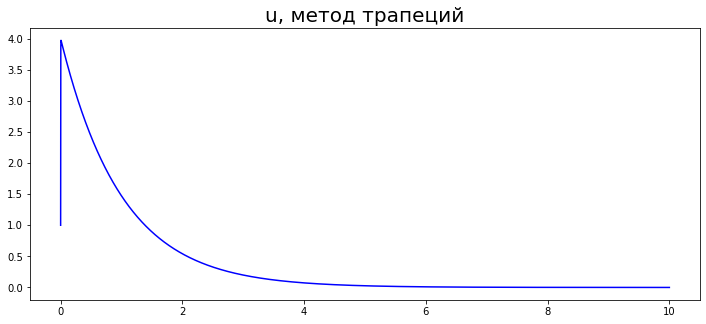

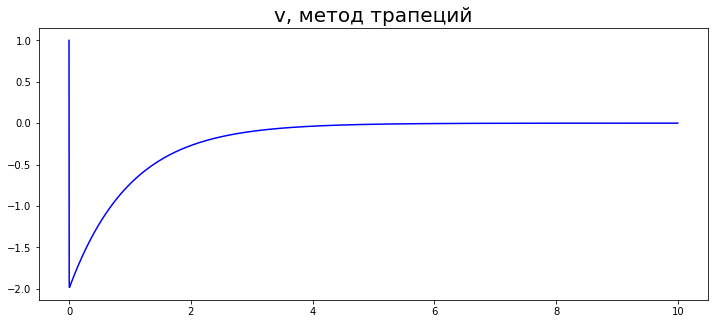

h =  0.0025


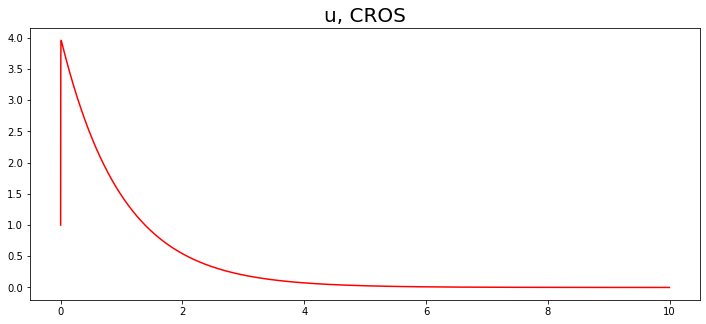

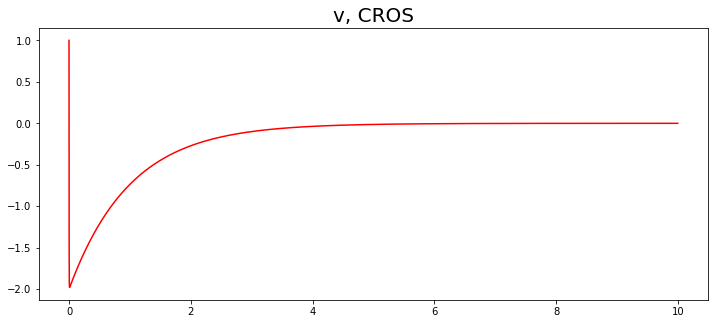

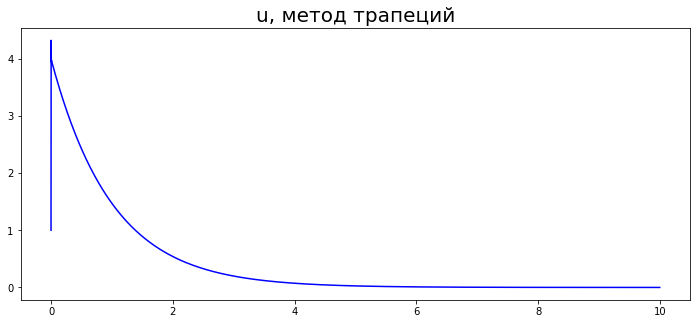

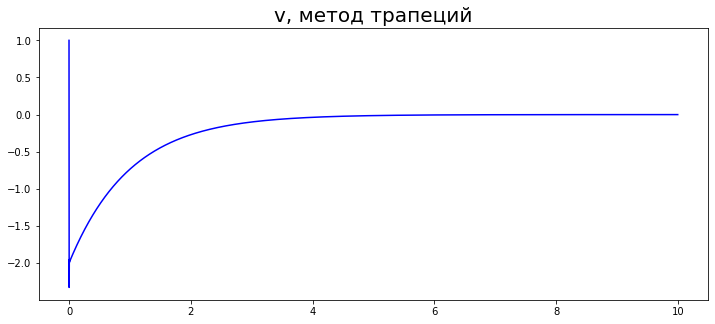

h =  0.005


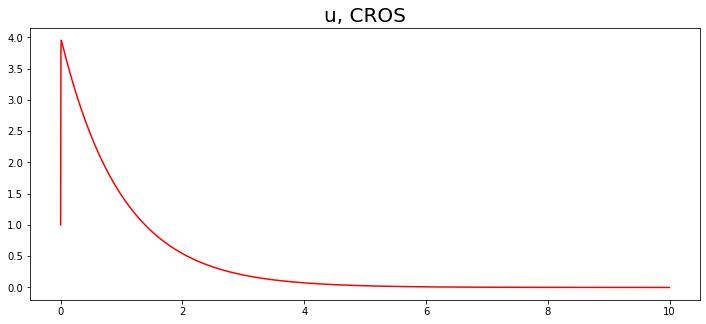

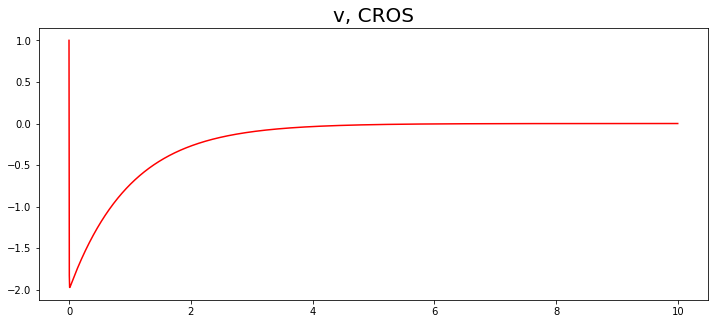

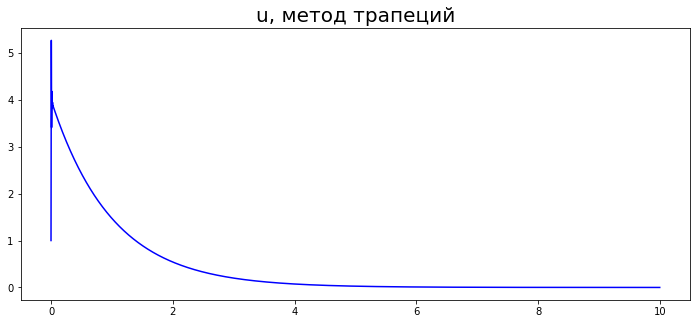

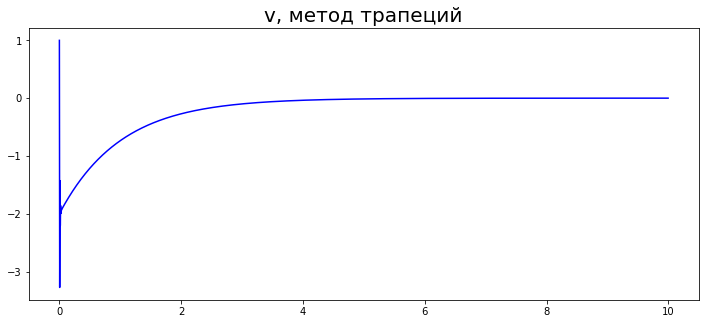

h =  0.01


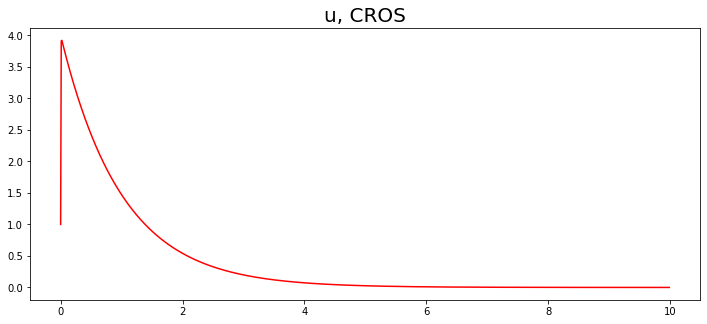

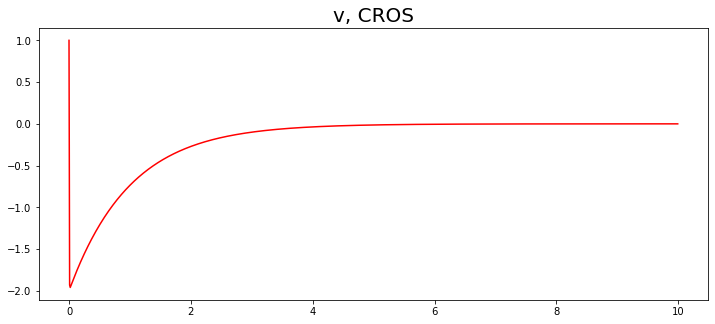

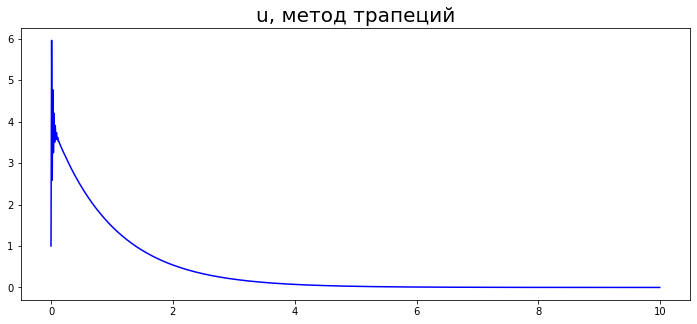

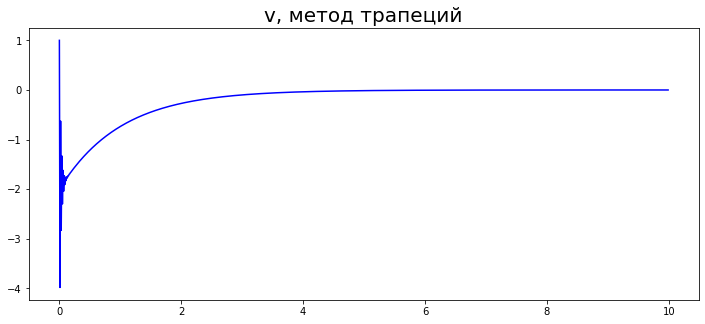

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

u_0 = [1, 1]
y_1 = [0, 0]
A = [[998, 1998], [-999, -1999]]
E = [[1, 0], [0, 1]]
B = [[0 for j in range(4)] for i in range(4)]
F = [0, 0, 0, 0]
W = [0, 0, 0, 0]

def method_CROS (h,n):
    y = [[0 for j in range(n)] for i in range(2)]
    y_0 = [1, 1]
    for i in range (2):
        for j in range (2):
            B[i][j] = E[i][j] - h * A[i][j]/2
            B[i + 2][j + 2] = B[i][j]
            B[i][j + 2] = h * A[i][j]/2
            B[i + 2][j] = - B[i][j + 2]
    for k in range(n):
        y[0][k] = y_0[0]
        y[1][k] = y_0[1]
        for i in range(2):
            F[i] = 0
            for j in range(2):
                F[i] += A[i][j]*y_0[j]
        W = np.linalg.solve(B, F)
        for i in range(2):
            y_1[i] = y_0[i] + h * W[i]
            y_0[i] = y_1[i]
            
    x_values = np.array([h * k for k in range(n)])
    u_values = np.array([y[0][k] for k in range(n)])
    v_values = np.array([y[1][k] for k in range(n)])
    
    plt.figure(figsize=(12,5))
    plt.title('u, CROS', fontsize = 20)
    plt.plot(x_values, u_values,'-', c='red', markersize=3)
    plt.show()
    
    plt.figure(figsize=(12,5))
    plt.title('v, CROS', fontsize = 20)
    plt.plot(x_values, v_values,'-', c='red', markersize=3)
    plt.show()

def method_a (h,n):
    y = [[0 for j in range(n)] for i in range(2)]
    y[0][0] = 1
    y[1][0] = 1
    for i in range(1,n):
        y[0][i] = ((y[0][i - 1] + h / 2 * (998 * y[0][i - 1] + 1998 * y[1][i - 1])) * (1999 * h + 2) + (y[1][i - 1] + h / 2 * (-999 * y[0][i - 1] - 1999 * y[1][i - 1])) * 1998 * h) / (500 * h * h + 1001 * h + 2)
        y[1][i] = (-(y[0][i - 1] + h / 2 * (998 * y[0][i - 1] + 1998 * y[1][i - 1])) * 999 * h + (y[1][i - 1] + h / 2 * (-999 * y[0][i - 1] - 1999 * y[1][i - 1])) * (2 - 998 * h)) / (500 * h * h + 1001 * h + 2)
    
    x_values = np.array([h * k for k in range(n)])
    u_values = np.array([y[0][k] for k in range(n)])
    v_values = np.array([y[1][k] for k in range(n)])
    
    plt.figure(figsize=(12,5))
    plt.title('u, метод трапеций', fontsize = 20)
    plt.plot(x_values, u_values,'-', c='blue', markersize=3)
    plt.show()
    
    plt.figure(figsize=(12,5))
    plt.title('v, метод трапеций', fontsize = 20)
    plt.plot(x_values, v_values,'-', c='blue', markersize=3)
    plt.show()

x_values = np.array([0.0001 * k for k in range(100000)])
u_values = np.array([-3 * math.exp(-1000 * t) + 4 * math.exp(-t) for t in x_values])
v_values = np.array([ 3 * math.exp(-1000 * t) - 2 * math.exp(-t) for t in x_values])

plt.figure(figsize=(12,5))
plt.title('u точное', fontsize = 20)
plt.plot(x_values, u_values,'-', c='green', markersize=3)
plt.show()

plt.figure(figsize=(12,5))
plt.title('v точное', fontsize = 20)
plt.plot(x_values, v_values,'-', c='green', markersize=3)
plt.show()

t = [0.0001, 0.001, 0.0025, 0.005, 0.01]
N = [100000, 10000, 4000, 2000, 1000]

for p in range(5):
    print('h = ', t[p])
    method_CROS (t[p], N[p])
    method_a (t[p], N[p])
            